# ARIMA Approach using AUTO-Arima

In [1]:
import pandas as pd

data = pd.read_excel('processed.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [22]:
missing_values = data.isnull().sum()

missing_values_summary = missing_values[missing_values > 0]
data_head = data.head()

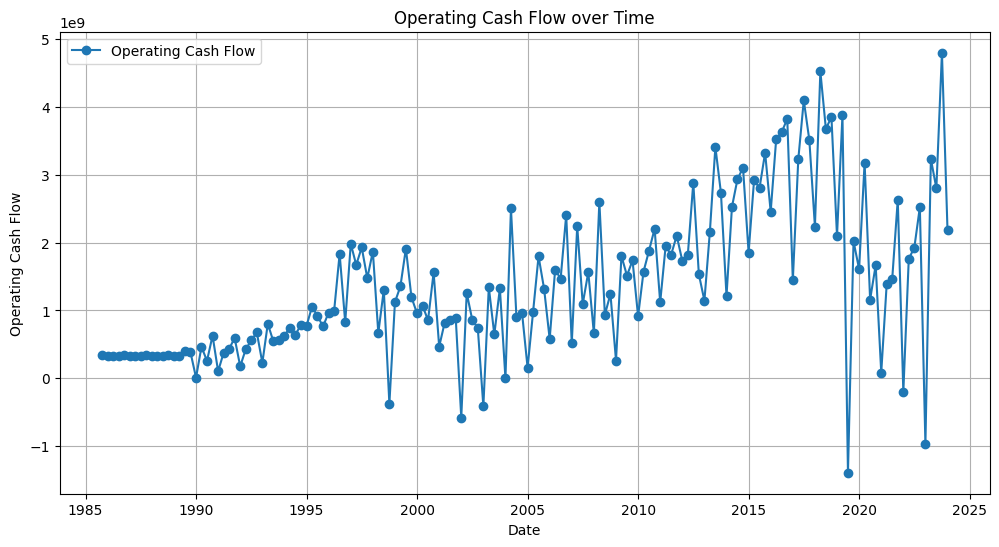

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['OperatingCashFlow'], label='Operating Cash Flow', marker='o')
plt.title('Operating Cash Flow over Time')
plt.xlabel('Date')
plt.ylabel('Operating Cash Flow')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
pip install pmdarima

In [27]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

train = data['OperatingCashFlow'].iloc[:-4]  # Last 12 data points as test set, rest for training
test = data['OperatingCashFlow'].iloc[-4:]

# Use auto_arima to find the best ARIMA model on the training set
auto_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Summarize the model
print(auto_model.summary())

# Forecast the test set
forecast = auto_model.predict(n_periods=len(test))

# Calculate and print performance metrics
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs(test - forecast) / np.abs(test)) * 100  # MAPE calculation

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape, "%")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6515.825, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6630.557, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6562.144, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6542.672, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6628.570, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6514.457, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6552.055, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6536.244, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6514.468, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6554.879, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6543.158, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6513.312, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6492.825, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6492.420, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept

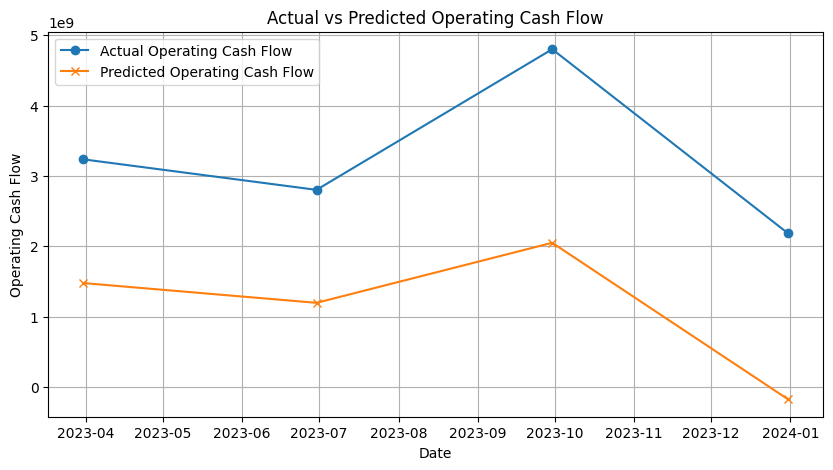

In [28]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Operating Cash Flow', marker='o')
plt.plot(test.index, forecast, label='Predicted Operating Cash Flow', marker='x')
plt.title('Actual vs Predicted Operating Cash Flow')
plt.xlabel('Date')
plt.ylabel('Operating Cash Flow')
plt.legend()
plt.grid(True)
plt.show()


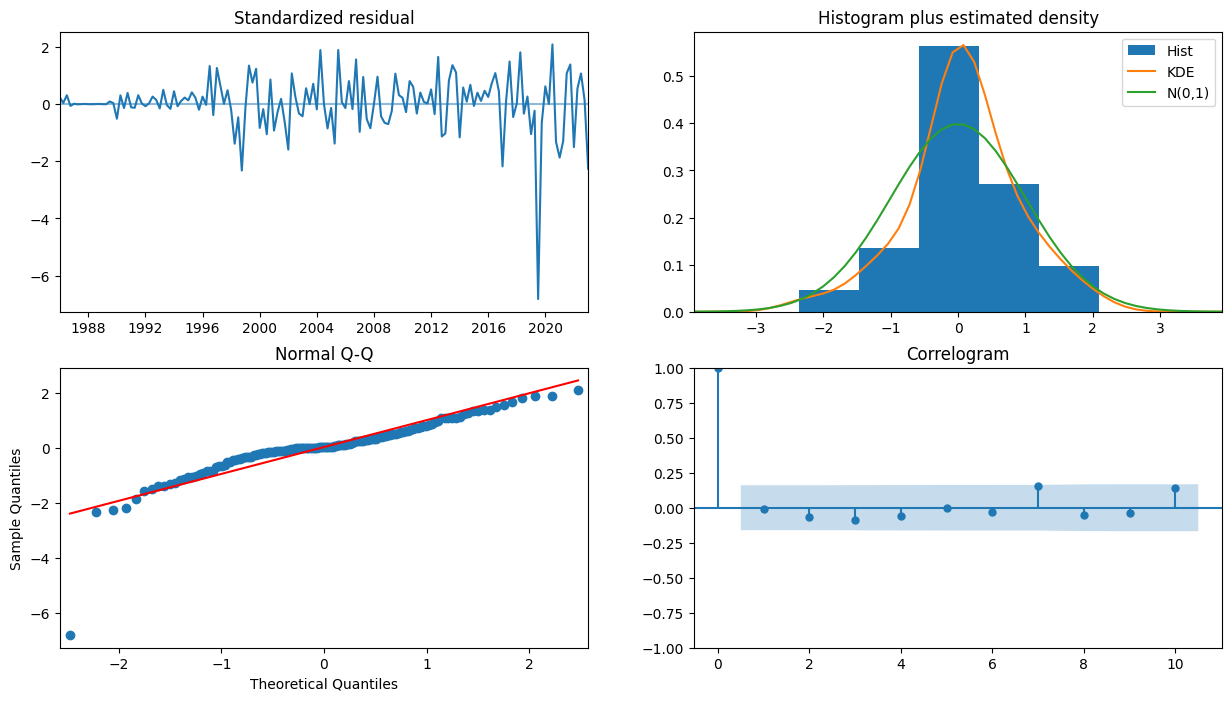

Forecast: 2023-03-31    1.476646e+09
2023-06-30    1.195468e+09
2023-09-30    2.049378e+09
2023-12-31   -1.751088e+08
Freq: QE-DEC, dtype: float64
Confidence Intervals: [[ 1.38070274e+08  2.81522212e+09]
 [-1.92970297e+08  2.58390573e+09]
 [ 6.16159551e+08  3.48259696e+09]
 [-1.61789581e+09  1.26767818e+09]]


In [29]:
auto_model.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
n_periods = 4  # You can change this to forecast more or fewer periods
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Print the forecast
print("Forecast:", forecast)
print("Confidence Intervals:", conf_int)

# USING ARIMA MANUAL

In [30]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(data['OperatingCashFlow'])

# Display ADF test results
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output


Test Statistic                  -1.489410
p-value                          0.538743
#Lags Used                       4.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64

In [31]:
# Differencing the data
df_diff = data['OperatingCashFlow'].diff().dropna()

# Re-run ADF test on the differenced data
adf_test_diff = adfuller(df_diff)

# Display ADF test results for the differenced data
adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff


Test Statistic                -7.288767e+00
p-value                        1.435514e-10
#Lags Used                     4.000000e+00
Number of Observations Used    1.480000e+02
Critical Value (1%)           -3.475325e+00
Critical Value (5%)           -2.881275e+00
Critical Value (10%)          -2.577293e+00
dtype: float64

In [32]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# I'll assume your data is loaded into a pandas DataFrame with a column named 'OperatingCashFlow'
# that contains the time series data. The DataFrame index should be a DatetimeIndex.

# Function to perform the Augmented Dickey-Fuller test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')  # AIC will choose the best lag for us
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

# Perform ADF test on the original data
print('Results of Dickey-Fuller Test on Original Data:')
adf_test(data['OperatingCashFlow'])

# Differencing the time series
data_diff = data['OperatingCashFlow'].diff().dropna()  # First difference to remove trend

# Perform ADF test on the differenced data
print('\nResults of Dickey-Fuller Test on Differenced Data:')
adf_test(data_diff)

Results of Dickey-Fuller Test on Original Data:
ADF Statistic: -1.4894101199406604
p-value: 0.5387433453512986
Critical Value (1%): -3.4750180242954167
Critical Value (5%): -2.8811408028842043
Critical Value (10%): -2.577221358046935

Results of Dickey-Fuller Test on Differenced Data:
ADF Statistic: -7.288767153128805
p-value: 1.435513909659143e-10
Critical Value (1%): -3.4753253063120644
Critical Value (5%): -2.881274703275226
Critical Value (10%): -2.5772928360116873


### Thus we can conclude that Time series is one time differencing

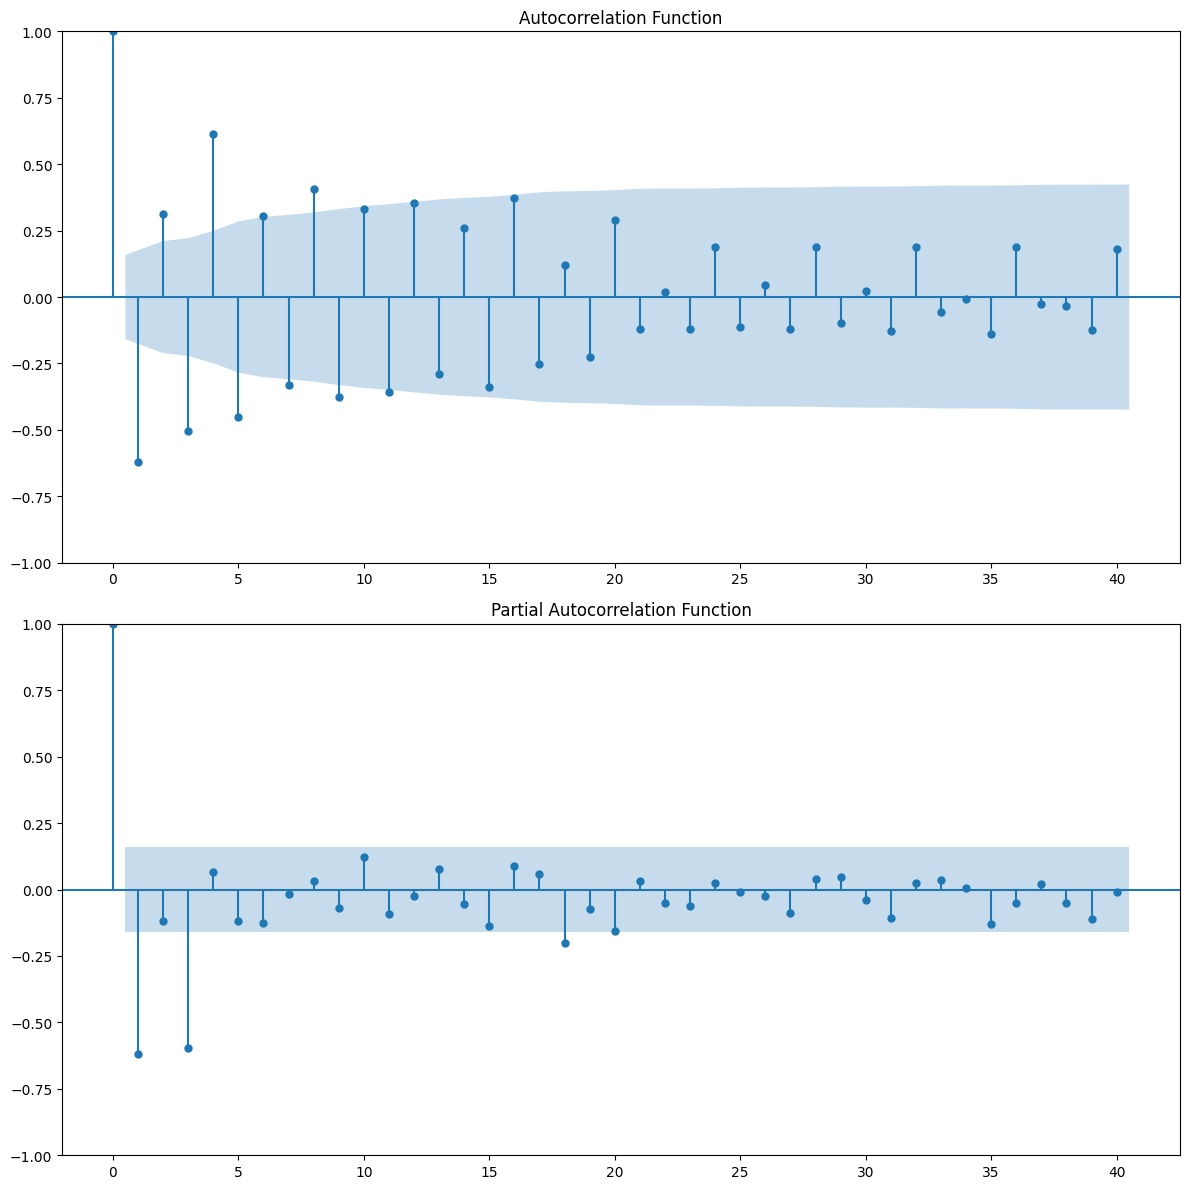

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot ACF
plot_acf(df_diff, lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot PACF
plot_pacf(df_diff, lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


C:\Users\saiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\saiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\saiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


RMSE: 2169292042.2862873
MAE: 1562537004.6933982
MAPE: 99.82873155666351 %


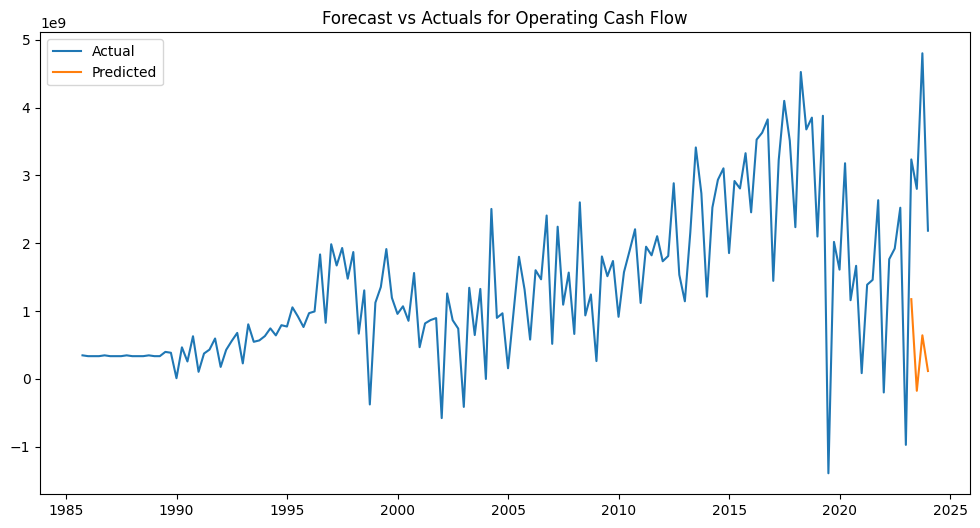

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit ARIMA model. Note: You'll need to choose the order (p, d, q) based on ACF and PACF plots or grid search
model_op = ARIMA(train_op, order=(1,1,1))
results_op = model_op.fit()

predictions_op = results_op.forecast(steps=4)

last_value_op = data['OperatingCashFlow'].iloc[-5]
predictions_op_cumsum = predictions_op.cumsum()
predicted_op = predictions_op_cumsum + last_value_op

# Evaluate the model using RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_op = sqrt(mean_squared_error(test_op, predictions_op))
mae = mean_absolute_error(test_op, predictions_op)
mape = np.mean(np.abs(test_op - predictions_op) / np.abs(test_op)) * 100
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape, "%")

# Plot the actual vs. predicted values
plt.figure(figsize=(12,6))
plt.plot(data['OperatingCashFlow'], label='Actual')
plt.plot(predicted_op, label='Predicted')
plt.legend()
plt.title('Forecast vs Actuals for Operating Cash Flow')
plt.show()